In [1]:
# packages
from nba_api.stats.endpoints import shotchartdetail
import json
import requests
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Basketball court drawing
# https://towardsdatascience.com/make-a-simple-nba-shot-chart-with-python-e5d70db45d0d

def create_court(ax, color):
    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)

    # 3PT Arc:
    ax.add_artist(matplotlib.patches.Arc((0, 140), 440, 315, theta1=0,
                                  theta2=180, facecolor='none', edgecolor=color, lw=2))

    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(matplotlib.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))

    # Rim
    ax.add_artist(matplotlib.patches.Circle((0, 60), 15, facecolor='none', edgecolor='red', lw=2))

    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color='red')

    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)

    return ax

In [3]:
df = pd.read_csv('dataset.csv')
df.describe()

,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
count,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.0,2987.000000
mean,2.418480,5.317041,28.879813,12.461332,0.688651,85.212923,1.0,0.494811
std,1.119291,3.411044,17.360484,8.992709,103.898403,82.479396,0.0,0.500057
min,1.000000,0.000000,0.000000,0.000000,-244.000000,-44.000000,1.0,0.000000
25%,1.000000,2.000000,14.000000,2.000000,-77.000000,11.000000,1.0,0.000000
50%,2.000000,5.000000,29.000000,14.000000,0.000000,62.000000,1.0,0.000000
75%,3.000000,8.000000,44.000000,19.000000,85.500000,147.000000,1.0,1.000000
max,5.000000,12.000000,59.000000,44.000000,245.000000,389.000000,1.0,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2987 entries, 0 to 2986
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PLAYER_NAME          2987 non-null   object
 1   PERIOD               2987 non-null   int64 
 2   MINUTES_REMAINING    2987 non-null   int64 
 3   SECONDS_REMAINING    2987 non-null   int64 
 4   ACTION_TYPE          2987 non-null   object
 5   SHOT_TYPE            2987 non-null   object
 6   SHOT_ZONE_BASIC      2987 non-null   object
 7   SHOT_ZONE_AREA       2987 non-null   object
 8   SHOT_ZONE_RANGE      2987 non-null   object
 9   SHOT_DISTANCE        2987 non-null   int64 
 10  LOC_X                2987 non-null   int64 
 11  LOC_Y                2987 non-null   int64 
 12  SHOT_ATTEMPTED_FLAG  2987 non-null   int64 
 13  SHOT_MADE_FLAG       2987 non-null   int64 
dtypes: int64(8), object(6)
memory usage: 326.8+ KB


In [5]:
# going to split the data frames up by player instead of having them combined

mj_df = df[df['PLAYER_NAME']=='Michael Jordan']
lbj_df = df[df['PLAYER_NAME']=='LeBron James']
mj_df.describe()

,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
count,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.0,1892.000000
mean,2.340381,5.337209,28.852008,12.822410,5.719873,78.837738,1.0,0.486258
std,1.100165,3.483652,17.202139,7.698315,111.091093,71.327287,0.0,0.499943
min,1.000000,0.000000,0.000000,0.000000,-235.000000,-44.000000,1.0,0.000000
25%,1.000000,2.000000,14.000000,9.000000,-96.000000,6.000000,1.0,0.000000
50%,2.000000,5.000000,29.000000,14.000000,0.000000,67.000000,1.0,0.000000
75%,3.000000,8.000000,43.000000,18.000000,107.000000,134.000000,1.0,1.000000
max,5.000000,12.000000,59.000000,44.000000,233.000000,389.000000,1.0,1.000000


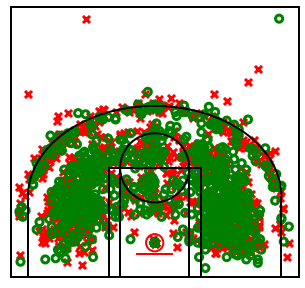

In [6]:
 # Michael Jordan
 # General plot parameters
matplotlib.rcParams['font.family'] = 'Avenir'
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['axes.linewidth'] = 2

# Draw basketball court
fig = plt.figure(figsize=(4,3.76))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')

x_missed = mj_df[mj_df['SHOT_MADE_FLAG'] == 0]['LOC_X']
y_missed = mj_df[mj_df['SHOT_MADE_FLAG'] == 0]['LOC_Y'] + 60

x_made = mj_df[mj_df['SHOT_MADE_FLAG'] == 1]['LOC_X']
y_made = mj_df[mj_df['SHOT_MADE_FLAG'] == 1]['LOC_Y'] + 60

ax.scatter(x_missed, y_missed, c='r', marker='x', s = 50, linewidths=3)
ax.scatter(x_made, y_made, facecolors='none', edgecolors='g', marker='o', s = 50, linewidths=3)

# plt.savefig('ShotChart.png', dpi=300, bbox_inches='tight')
plt.show()

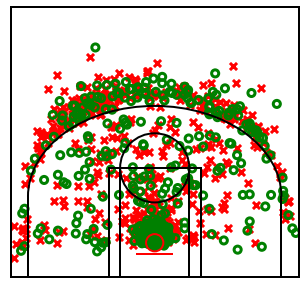

In [7]:
# LeBron James
# Draw basketball court
fig = plt.figure(figsize=(4,3.76))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')

x_missed = lbj_df[lbj_df['SHOT_MADE_FLAG'] == 0]['LOC_X']
y_missed = lbj_df[lbj_df['SHOT_MADE_FLAG'] == 0]['LOC_Y'] + 60

x_made = lbj_df[lbj_df['SHOT_MADE_FLAG'] == 1]['LOC_X']
y_made = lbj_df[lbj_df['SHOT_MADE_FLAG'] == 1]['LOC_Y'] + 60

ax.scatter(x_missed, y_missed, c='r', marker='x', s = 50, linewidths=3)
ax.scatter(x_made, y_made, facecolors='none', edgecolors='g', marker='o', s = 50, linewidths=3)

# plt.savefig('ShotChart.png', dpi=300, bbox_inches='tight')
plt.show()


In [22]:
# Function to create zone specific shot charts

def create_zone_chart(data_frame, shot_type, shot_zone_area, player):
    fig = plt.figure(figsize=(4,3.76))
    ax = fig.add_axes([0, 0, 1, 1])
    ax = create_court(ax, 'black')


    points = 0
    if shot_type == '2PT Field Goal':
        points = 2
    else:
        points = 3

    x_missed_center = data_frame[(data_frame['SHOT_MADE_FLAG'] == 0) & (data_frame['SHOT_ZONE_AREA'] == shot_zone_area) &
                             (data_frame['SHOT_TYPE'] == shot_type) & (data_frame['PLAYER_NAME'] == player)]['LOC_X']
    y_missed_center = data_frame[(data_frame['SHOT_MADE_FLAG'] == 0) & (df['SHOT_ZONE_AREA'] == shot_zone_area) &
                             (data_frame['SHOT_TYPE'] == shot_type) & (data_frame['PLAYER_NAME'] == player)]['LOC_Y'] + 60

    x_made_center = data_frame[(data_frame['SHOT_MADE_FLAG'] == 1) & (data_frame['SHOT_ZONE_AREA'] == shot_zone_area) &
                           (data_frame['SHOT_TYPE'] == shot_type) & (data_frame['PLAYER_NAME'] == player)]['LOC_X']
    y_made_center = data_frame[(data_frame['SHOT_MADE_FLAG'] == 1) & (data_frame['SHOT_ZONE_AREA'] == shot_zone_area) &
                           (data_frame['SHOT_TYPE'] == shot_type) & (data_frame['PLAYER_NAME'] == player)]['LOC_Y'] + 60

    shooting_percentage = len(x_made_center)/len((x_made_center+x_missed_center))
    shots_made = len(x_made_center)
    shots_attempted = len((x_made_center+x_missed_center))
    points_per_shot_attempt = (len(x_made_center)*points)/len((x_made_center+x_missed_center))

    ax.scatter(x_missed_center, y_missed_center, c='r', marker='x', s = 50, linewidths=3)
    ax.scatter(x_made_center, y_made_center, facecolors='none', edgecolors='g', marker='o', s = 50, linewidths=3)

    ax.text(0,1.05,player + ': '+ shot_zone_area + ' '+ shot_type +'s' + '\n'+ str('{:.2%}'.format(shooting_percentage)) +
            ' on '+ str(shots_made) + ' out of '+ str(shots_attempted) + ' shooting\n' +
            'Points Per Shot Attempt: '+ str('{:.2}'.format(points_per_shot_attempt)) ,
            transform = ax.transAxes, ha='left', va='baseline')
    # print(shooting_percentage, shots_made, shots_attempted, points_per_shot_attempt)
    plt.savefig('.\plots\\'+player+shot_zone_area+shot_type+'.png', dpi=300, bbox_inches='tight')
    plt.show()
    return shooting_percentage, shots_made, shots_attempted, points_per_shot_attempt

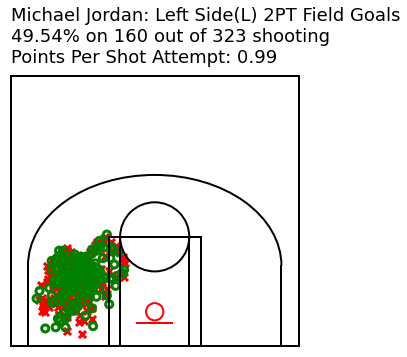

[0.4953560371517028, 160, 323, 0.9907120743034056]

In [25]:
# Michael Jordan - Left Side 2 Pointers
sp, sm, sa, ppa = create_zone_chart(df, '2PT Field Goal', 'Left Side(L)', 'Michael Jordan')
the_list = []
the_list.extend((sp,sm,sa,ppa))
the_list

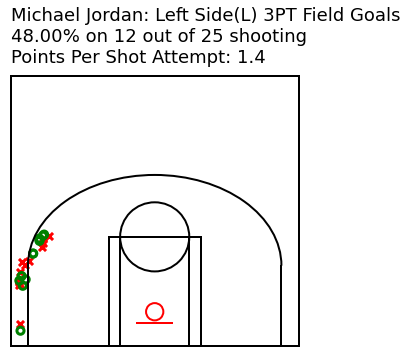

(0.48, 12, 25, 1.44)

In [26]:
# Michael Jordan - Left Side 3 Pointers
create_zone_chart(df, '3PT Field Goal', 'Left Side(L)', 'Michael Jordan')

In [ ]:
# Michael Jordan - Left Side Center 2 Pointers
create_zone_chart(df, '2PT Field Goal', 'Left Side Center(LC)', 'Michael Jordan')

In [ ]:
# Michael Jordan - Left Side Center 3 Pointers
create_zone_chart(df, '3PT Field Goal', 'Left Side Center(LC)', 'Michael Jordan')

In [ ]:
# Michael Jordan - Center 2 Pointers
create_zone_chart(df, '2PT Field Goal', 'Center(C)', 'Michael Jordan')

In [ ]:
# Let's break up the center into 0-11 and 12+ feet.  To do this, we can use the shot distance column as a filter.
mj_center_eleven_and_less = df[(df['PLAYER_NAME']=='Michael Jordan') & (df['SHOT_DISTANCE'] <= 11)]
create_zone_chart(mj_center_eleven_and_less, '2PT Field Goal', 'Center(C)', 'Michael Jordan')


In [ ]:
mj_center_twelve_up = df[(df['PLAYER_NAME']=='Michael Jordan') & (df['SHOT_DISTANCE'] > 11)]
create_zone_chart(mj_center_twelve_up, '2PT Field Goal', 'Center(C)', 'Michael Jordan')

In [ ]:
# Michael Jordan - Center 3 Pointers
create_zone_chart(df, '3PT Field Goal', 'Center(C)', 'Michael Jordan')

In [ ]:
# Michael Jordan - Right Side Center 2 Pointers
create_zone_chart(df, '2PT Field Goal', 'Right Side Center(RC)', 'Michael Jordan')

In [ ]:
# Michael Jordan - Right Side Center 3 Pointers
create_zone_chart(df, '3PT Field Goal', 'Right Side Center(RC)', 'Michael Jordan')

In [ ]:
# Michael Jordan - Right Side 2 Pointers
create_zone_chart(df, '2PT Field Goal', 'Right Side(R)', 'Michael Jordan')

In [ ]:
# Michael Jordan - Right Side 3 Pointers
create_zone_chart(df, '3PT Field Goal', 'Right Side(R)', 'Michael Jordan')

In [ ]:
# LeBron James - Left Side 2 Pointers
create_zone_chart(df, '2PT Field Goal', 'Left Side(L)', 'LeBron James')

In [ ]:
# LeBron James - Left Side 3 Pointers
create_zone_chart(df, '3PT Field Goal', 'Left Side(L)', 'LeBron James')

In [ ]:
# LeBron James - Left Side Center 2 Pointers
create_zone_chart(df, '2PT Field Goal', 'Left Side Center(LC)', 'LeBron James')

In [ ]:
# LeBron James - Left Side Center 3 Pointers
create_zone_chart(df, '3PT Field Goal', 'Left Side Center(LC)', 'LeBron James')

In [ ]:
# LeBron James - Center 2 Pointers
create_zone_chart(df, '2PT Field Goal', 'Center(C)', 'LeBron James')

In [ ]:
# Let's break up the center into 0-11 and 12+ feet.  To do this, we can use the shot distance column as a filter.
lbj_center_eleven_and_less = df[(df['PLAYER_NAME']=='LeBron James') & (df['SHOT_DISTANCE'] <= 11)]
create_zone_chart(lbj_center_eleven_and_less, '2PT Field Goal', 'Center(C)', 'LeBron James')

In [ ]:
# Let's break up the center into 0-11 and 12+ feet.  To do this, we can use the shot distance column as a filter.
lbj_center_twelve_up = df[(df['PLAYER_NAME']=='LeBron James') & (df['SHOT_DISTANCE'] > 11)]
create_zone_chart(lbj_center_twelve_up, '2PT Field Goal', 'Center(C)', 'LeBron James')

In [ ]:
# LeBron James - Center 3 Pointers
create_zone_chart(df, '3PT Field Goal', 'Center(C)', 'LeBron James')

In [ ]:
# LeBron James - Right Side Center 2 Pointers
create_zone_chart(df, '2PT Field Goal', 'Right Side Center(RC)', 'LeBron James')

In [ ]:
# LeBron James - Right Side Center 3 Pointers
create_zone_chart(df, '3PT Field Goal', 'Right Side Center(RC)', 'LeBron James')

In [ ]:
# LeBron James - Right Side 2 Pointers
create_zone_chart(df, '2PT Field Goal', 'Right Side(R)', 'LeBron James')

In [ ]:
# LeBron James - Right Side 3 Pointers
create_zone_chart(df, '3PT Field Goal', 'Right Side(R)', 'LeBron James')